Step 1: Test each of the time-series to determine their order of integration. Ideally, this should involve using a test (such as the ADF test) for which the null hypothesis is non-stationarity; as well as a test (such as the KPSS test) for which the null is stationarity. It’s good to have a cross-check

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
import pickle

In [23]:
import io
%cd "C:\Users\HP\Desktop\SHUBHANGI\MAJOR PROJECT"

C:\Users\HP\Desktop\SHUBHANGI\MAJOR PROJECT


In [24]:
data = pd.read_csv("FINAL DATA.csv", index_col='DATE')


In [25]:
data

,GDP,IMPORTS,EXPORTS,ECONOMIC GROWTH
DATE,,,,
30-06-2000,3852.54,1052.5440,851.0805,-0.970821
30-09-2000,3986.94,1046.7879,908.6415,-0.097240
31-12-2000,4152.55,1064.0562,902.8854,0.111344
31-03-2001,4269.13,994.9830,960.4464,1.975735
30-06-2001,4282.93,1050.8994,851.9028,-4.338040
...,...,...,...,...
31-12-2021,38507.72,13723.3647,8637.4392,-19.584957
31-03-2022,41123.60,13824.5076,9151.3767,-5.342438
30-06-2022,37479.08,15609.7209,9806.7498,-22.973405


In [26]:
data.columns

Index(['GDP', 'IMPORTS', 'EXPORTS', 'ECONOMIC GROWTH'], dtype='object')

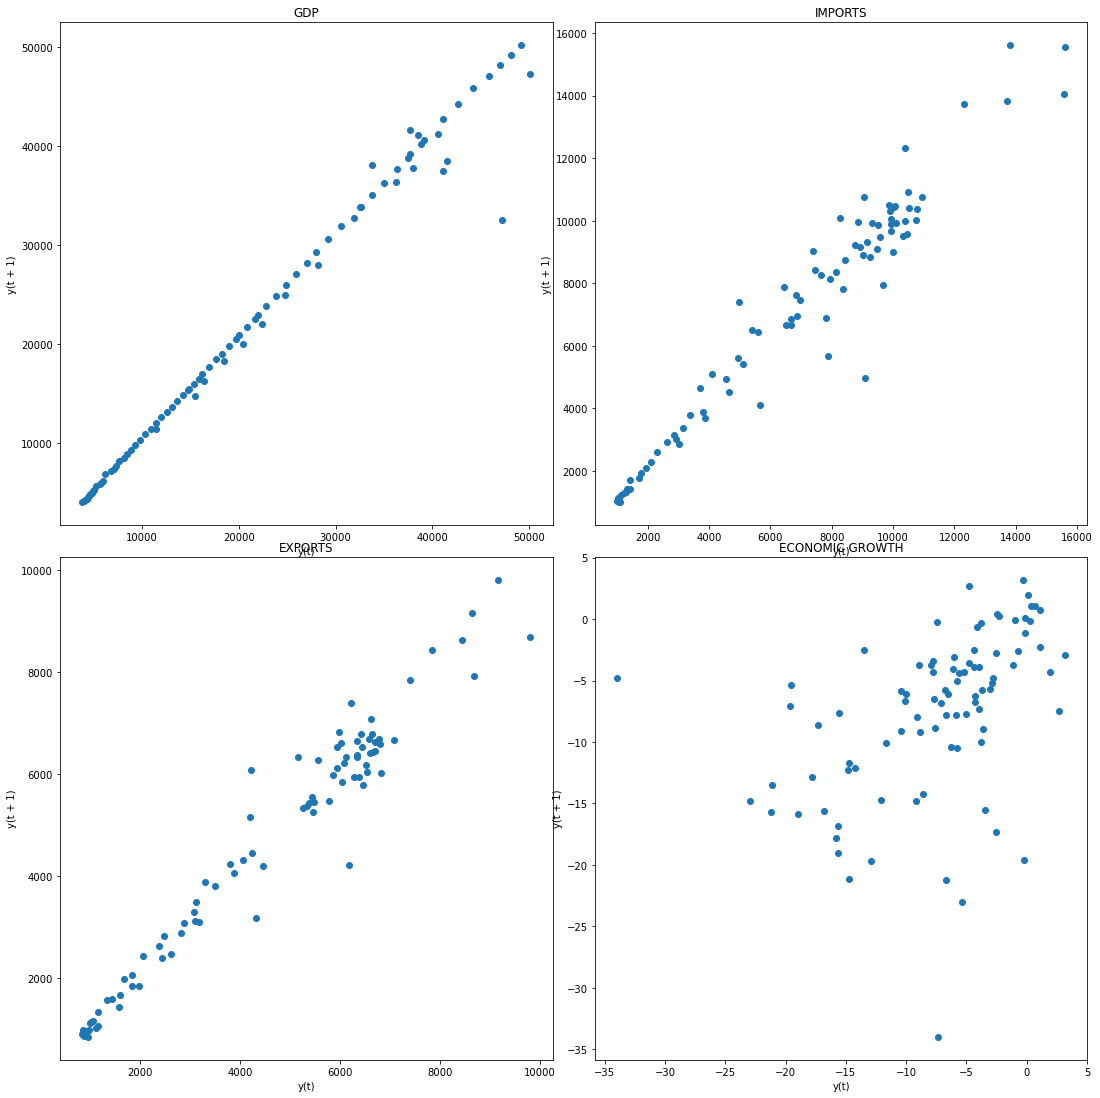

In [27]:
from pandas.plotting import lag_plot
   
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout()

variables = ['GDP', 'IMPORTS', 'EXPORTS', 'ECONOMIC GROWTH']

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    lag_plot(data[var], ax=axs[row, col])
    axs[row, col].set_title(var)

plt.show()


Result: Data is not stationary. We will have to make it stationary using difference operation

In [28]:
#difference operation for stationarity
rawData = data.copy(deep=True)

In [29]:
data['GDP'] = data['GDP'] - data['GDP'].shift(1)
data['IMPORTS'] = data['IMPORTS'] - data['IMPORTS'].shift(1)
data['EXPORTS'] = data['EXPORTS'] - data['EXPORTS'].shift(1)
data['ECONOMIC GROWTH'] = data['ECONOMIC GROWTH'] - data['ECONOMIC GROWTH'].shift(1)
data = data.dropna()

In [30]:
# split data into train and test. We will need this later for VAR analysis
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [31]:
## ADF Null hypothesis: there is a unit root, meaning series is non-stationary
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd

variables = ['GDP', 'IMPORTS', 'EXPORTS', 'ECONOMIC GROWTH']

for var in variables:
    X = np.array(data[var])
    X = X[~np.isnan(X)]

    result = adfuller(X)
    print(f'ADF Statistic for {var}: {result[0]}')
    print(f'p-value for {var}: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

ADF Statistic for GDP: -8.975147154274186
p-value for GDP: 7.567286293063561e-15
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584
ADF Statistic for IMPORTS: -8.893962378001078
p-value for IMPORTS: 1.2210949664540267e-14
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584
ADF Statistic for EXPORTS: -10.17906415935717
p-value for EXPORTS: 6.770116880475284e-18
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584
ADF Statistic for ECONOMIC GROWTH: -3.6637781474624087
p-value for ECONOMIC GROWTH: 0.0046524759203848
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586


In [33]:
## KPSS Null hypothesis: there is a no unit root, meaning series is stationary
from statsmodels.tsa.stattools import kpss

# assuming 'data' is a pandas DataFrame containing the 4 variables
variables = ['GDP', 'IMPORTS', 'EXPORTS', 'ECONOMIC GROWTH']

for var in variables:
    X = np.array(data[var])
    X = X[~np.isnan(X)]

    statistic, p_value, n_lags, critical_values = kpss(X)
    
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

KPSS Statistic: 0.10073766565655115
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.08857972131592963
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.08692253693060918
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.08928477468481884
p-value: 0.1
num lags: 12
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\HP\ana

Result: ADF Null Hypothesis is rejected: Thus, data is stationary 
        KPSS Null Hypothesis could not be rejected. Thus, data is stationary

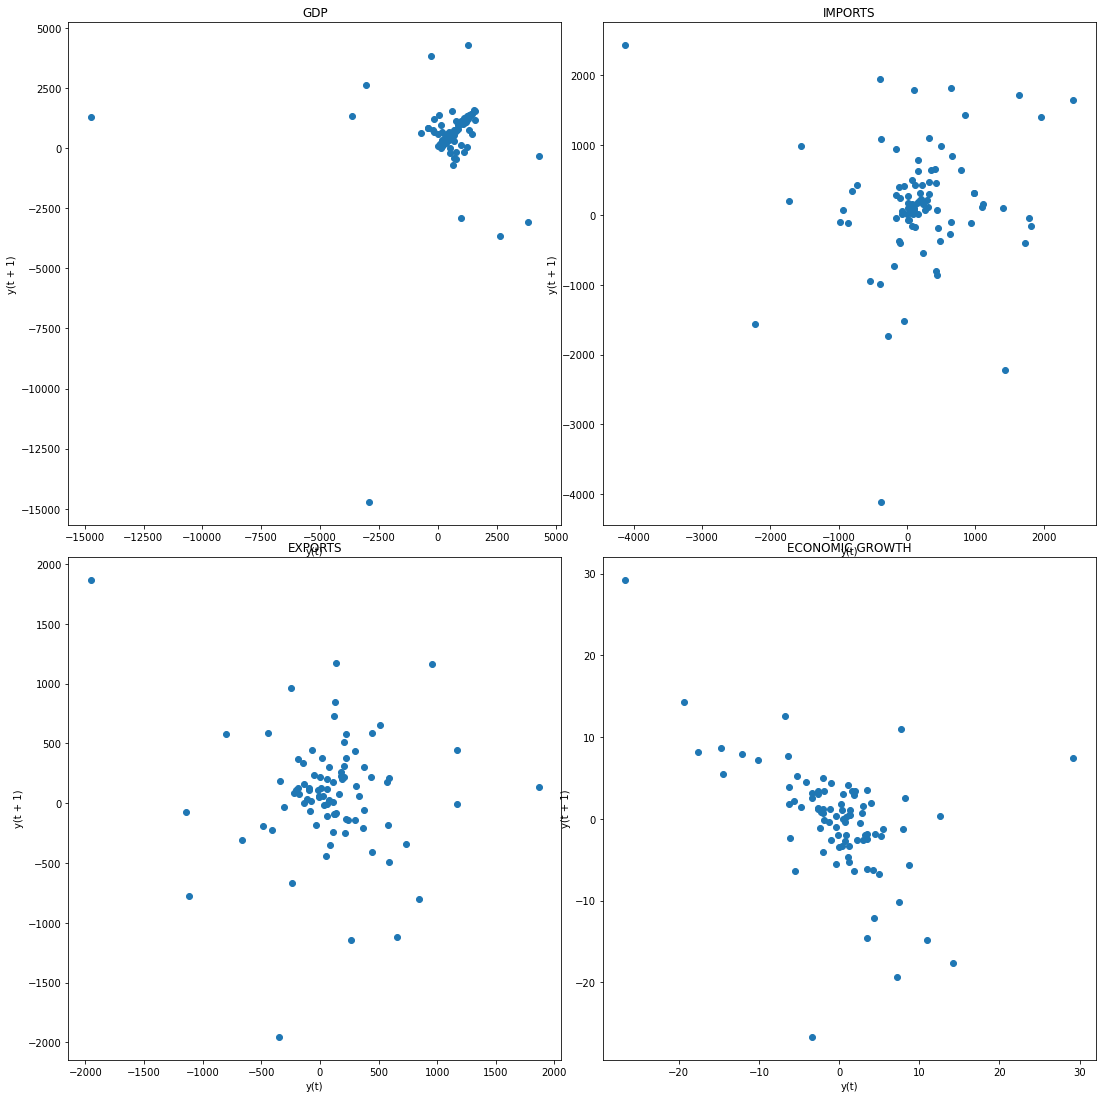

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.tight_layout()

variables = ['GDP', 'IMPORTS', 'EXPORTS', 'ECONOMIC GROWTH']

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    lag_plot(data[var], ax=axs[row, col])
    axs[row, col].set_title(var)

plt.show()

Result: lag plot is in confirmatory with ADF test and KPSS test



Step 2: Let the maximum order of integration for the group of time-series be m. So, if there are two time-series and one is found to be I(1) and the other is I(2), then m = 2. If one is I(0) and the other is I(1), then m = 1, etc.

Result: We saw above that for our case m = 4



Step 3: Set up a VAR model in the levels of the data, regardless of the orders of integration of the various time-series. Most importantly, you must not difference the data, no matter what you found at Step 1.//

Step 4: Determine the appropriate maximum lag length for the variables in the VAR, say p, using the usual methods. Specifically, base the choice of p on the usual information criteria, such as AIC, SIC.



In [35]:
# obtain the lag P for VAR
rawData = rawData.dropna()
model = VAR(rawData) #recall that rawData is w/o difference operation
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        print('FPE : ', result.fpe)
        print('HQIC: ', result.hqic, '\n')
    except:
        continue


Lag Order = 1
AIC :  42.22056963722885
BIC :  42.776082897302246
FPE :  2.1694985531093258e+18
HQIC:  42.444585237406464 

Lag Order = 2
AIC :  41.74094334531459
BIC :  42.747582775768045
FPE :  1.3460660258011986e+18
HQIC:  42.14669081192391 

Lag Order = 3
AIC :  41.67742516840374
BIC :  43.14130601332268
FPE :  1.2707470119208614e+18
HQIC:  42.26718601494389 

Lag Order = 4
AIC :  41.718729639638134
BIC :  43.64610610019574
FPE :  1.339856077453114e+18
HQIC:  42.49482470673222 

Lag Order = 5
AIC :  41.637169312429094
BIC :  44.03443876458368
FPE :  1.2597528169676122e+18
HQIC:  42.60195920414758 

Lag Order = 6
AIC :  41.62080881944714
BIC :  44.494516180023986
FPE :  1.2787450705322074e+18
HQIC:  42.77669429726647 

Lag Order = 7
AIC :  41.26740902792005
BIC :  44.62425127394177
FPE :  9.410030727828408e+17
HQIC:  42.61683135505808 

Lag Order = 8
AIC :  40.96020948470419
BIC :  44.80704033083854
FPE :  7.40243318502869e+17
HQIC:  42.5056507126415 

Lag Order = 9
AIC :  40.8328518

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


Result: The lag-order p = 10 on the basis of Akaike Information Criterion (AIC)

Step 5: Make sure that the VAR is well-specified. For example, ensure that there is no serial correlation in the residuals. If need be, increase p until any autocorrelation issues are resolved.



In [36]:
model = VAR(train)
model_fitted = model.fit(10)
model_fitted.summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 14, Mar, 2023
Time:                     17:35:53
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    48.5431
Nobs:                     66.0000    HQIC:                   45.2522
Log likelihood:          -1632.97    FPE:                1.22041e+19
AIC:                      43.1022    Det(Omega_mle):     1.76663e+18
--------------------------------------------------------------------
Results for equation GDP
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      -6.881177       901.202800           -0.008           0.994
L1.GDP                      0.631600         0.290657            2.173           0.030
L1.IMPORTS                  2.157505  

In [37]:
#Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
#The value of this statistic can vary between 0 and 4. 
#The closer it is to the value 2, then there is no significant serial correlation. 
#The closer to 0, there is a positive serial correlation, 
#and the closer it is to 4 implies negative serial correlation.


from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(data.columns, out):
    print(col, ':', round(val, 2))

GDP : 2.13
IMPORTS : 2.04
EXPORTS : 1.73
ECONOMIC GROWTH : 2.27


Result: There is no significant correlation between in the residuals

Step 6: If two or more of the time-series have the same order of integration, at Step 1, then test to see if they are cointegrated, preferably using Johansen’s methodology (based on your VAR) for a reliable result.



In [41]:
# perform Johansen's test to check co-integration

from statsmodels.tsa.vector_ar.vecm import coint_johansen

variables = ['GDP', 'IMPORTS', 'EXPORTS', 'ECONOMIC GROWTH']

# prepare data
X = data[variables]

# perform Johansen's test
result = coint_johansen(X, det_order=0, k_ar_diff=1)

# print out results
print('Eigenvalues:')
print(result.eig)

print('\nEigenvectors (normalised):')
print(result.evec)

print('\nCritical values:')
print(result.cvt)

print('\nTrace statistics:')
print(result.lr1)

print('\nMaximum eigenvalue statistics:')
print(result.lr2)


Eigenvalues:
[0.74502471 0.55583727 0.37906755 0.32415494]

Eigenvectors (normalised):
[[ 5.29795675e-05 -3.18274958e-05 -6.14889748e-04 -7.18691305e-04]
 [-2.56487205e-03  1.80535514e-03  8.06051161e-04 -2.93260814e-04]
 [ 3.45339402e-03 -3.97864404e-03  1.40429002e-03 -1.64713273e-03]
 [-4.76475711e-01 -1.81238334e-01  1.02771230e-01  1.11826128e-01]]

Critical values:
[[44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Trace statistics:
[268.09000286 147.83020408  76.41254776  34.4776463 ]

Maximum eigenvalue statistics:
[120.25979879  71.41765632  41.93490146  34.4776463 ]


result: The first part of the output shows the eigenvalues and eigenvectors. The eigenvalues represent the strength of the cointegrating relationship between the time series. In this case, there are four eigenvalues, with the largest being 0.7450 and the smallest being 0.3241. The eigenvectors show the coefficients that define the linear combination of the time series that form the cointegrating relationship.

The next part of the output shows the critical values for the test. The critical values are used to determine whether the eigenvalues are statistically significant at a given level of significance. In this case, there are four sets of critical values, each corresponding to a different number of cointegrating relationships.

The last part of the output shows the test statistics for the trace and maximum eigenvalue tests. These statistics are used to determine the number of cointegrating relationships. The trace statistic tests the null hypothesis that there are r cointegrating relationships against the alternative that there are r+1 cointegrating relationships. The maximum eigenvalue statistic tests the null hypothesis that there are r cointegrating relationships against the alternative that there are r+1 cointegrating relationships, but with a more powerful test.

In this case, the trace statistic values are [268.09, 147.83, 76.41, 34.48], and the maximum eigenvalue statistic values are [120.26, 71.42, 41.93, 34.48]. These values suggest that there are at most 3 cointegrating relationships among the time series.

Step 7: No matter what you conclude about cointegration at Step 6, this is not going to affect what follows. It just provides a possible cross-check on the validity of your results at the very end of the analysis.

Step 8: Now take the preferred VAR model and add in m additional lags of each of the variables into each of the equations.


In [42]:
model = VAR(train)
model_fitted = model.fit(10)
#get the lag order
lag_order = model_fitted.k_ar
print(lag_order)

10


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Step 9 and Step 10: Test for Granger non-causality. It’s essential that you don’t include the coefficients for the ‘extra’ m lags when you perform the tests. They are there just to fix up the asymptotics.



In [43]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=lag_order #becuase we got this value before. We are not suppose to add 1 to it
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

o = grangers_causation_matrix(train, variables = train.columns)  

In [44]:
o

,GDP_x,IMPORTS_x,EXPORTS_x,ECONOMIC GROWTH_x
GDP_y,1.0000,0.0000,0.0000,0.0094
IMPORTS_y,0.0483,1.0000,0.0000,0.3817
EXPORTS_y,0.0000,0.0011,1.0000,0.0088
ECONOMIC GROWTH_y,0.0000,0.0000,0.0092,1.0000


result: The values in the table represent the p-values for the null hypothesis that the lagged variable does not Granger-cause the other variable. A p-value below a significance level (typically 0.05) would lead to the rejection of the null hypothesis and indicate Granger-causality.

In this case, we can see that the variable GDP_x does not Granger-cause any of the other variables, as all the p-values are above the significance level. However, the variable IMPORTS_x does Granger-cause ECONOMIC GROWTH_x, as the p-value is below the significance level. Additionally, EXPORTS_x Granger-causes GDP_x and ECONOMIC GROWTH_x, as the p-values are below the significance level.

Overall, these results suggest that there is some causal relationship between these variables, with IMPORTS_x and EXPORTS_x potentially having a causal effect on ECONOMIC GROWTH_x and GDP_x. However, further analysis is needed to determine the direction and strength of these causal relationships.